In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

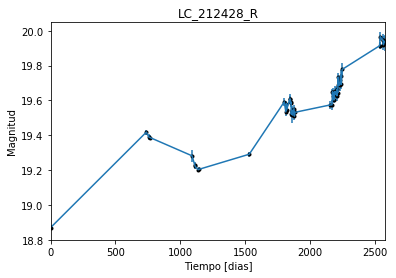

In [2]:
data = np.genfromtxt('LC_212428_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_212428_R')
plt.savefig("LC_212428_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

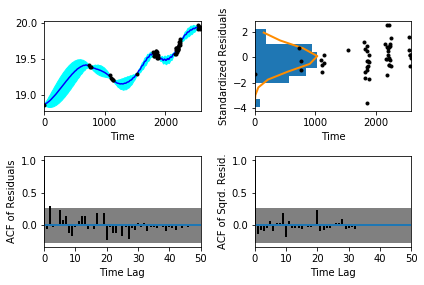

In [5]:
sample.assess_fit()

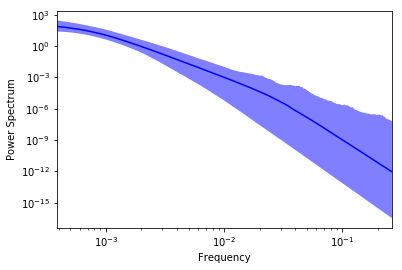

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

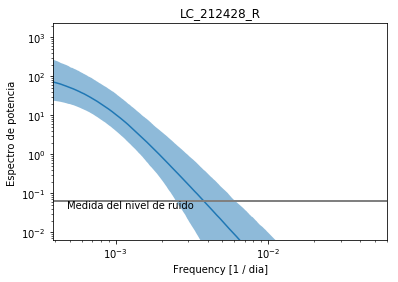

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_212428_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_212428_R')

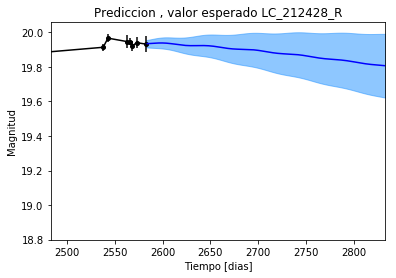

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_212428_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_212428_R')

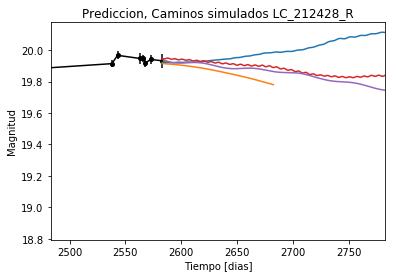

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_212428_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


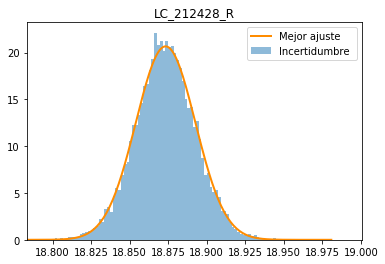

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_212428_R')
plt.savefig("Mejor_ajuste_LC_212428_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_212428_R')

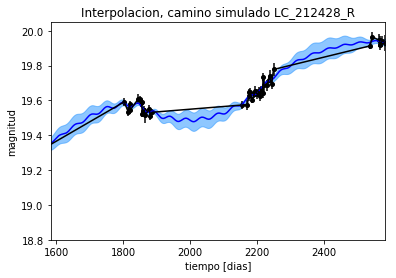

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_212428_R')

Text(0.5,1,'Interpolacion, camino simulado  LC_212428_R')

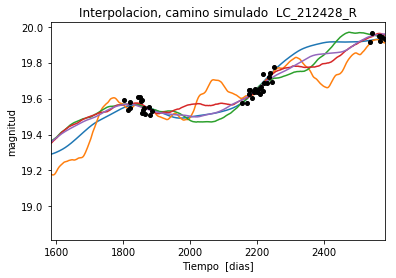

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado  LC_212428_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 650.058482246
Median: 0.00509872877141
Standard deviation: 0.0936743151914
68% credibility interval: [ 0.00063187  0.08757553]
95% credibility interval: [ 0.00041165  0.36442531]
99% credibility interval: [  3.92348116e-04   4.89862713e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 447.916729571
Median: 0.000791378684897
Standard deviation: 0.0465447564292
68% credibility interval: [ 0.00046085  0.00716525]
95% credibility interval: [ 0.00039722  0.13782855]
99% credibility interval: [ 0.0003891   0.34255891]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 538.868438513
Median: 0.00210413156677
Standard deviation: 0.109

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1389.26422721
Median: 108.271261666
Standard deviation: 1.57994351014
68% credibility interval: [ 106.48864699  109.34599944]
95% credibility interval: [ 103.95598939  109.86665496]
99% credibility interval: [ 101.65306719  110.35305481]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 215.656770579
Median: 0.227867350562
Standard deviation: 1.00629896014
68% credibility interval: [ 0.02846531  1.66082784]
95% credibility interval: [ 0.01221433  3.32752046]
99% credibility interval: [ 0.01054974  5.1403316 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 450.302093772
Median: 0.0489114216185
Standard deviation: 2.28801564396
68% credibility interval: [ 0.00381026  1.46004774]
95% credibility interval: [  2.81159358e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310996
Median: 3.96793006746e-48
Standard deviation: 2.25993237498e+60
68% credibility interval: [  9.46381574e-88   3.89986623e-12]
95% credibility interval: [  4.73416797e-137   5.26364584e+000]
99% credibility interval: [  4.34096717e-144   4.50393845e+029]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2192.78283776
Median: 19.3869757247
Standard deviation: 0.234234111813
68% credibility interval: [ 19.18790992  19.59235426]
95% credibility interval: [ 18.92225119  19.85066694]
99% credibility interval: [ 18.66875613  20.06757963]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 282.250063676
Median: 0.00047339612935
Standard deviation: 0.122658417007
68% credibility interval: [ 0.          0.15246036]
95% credibility interval: [ 0.          0.45111984]
99% credibility interval: [ 0.          0.51157594]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 282.250063676
Median: 0.00047339612935
Standard deviation: 0.122658417007
68% credibility interval: [ 0.          0.15246036]
95% credibility interval: [ 0.          0.45111984]
99% credibility interval: [ 0.          0.51157594]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 595.56124617
Median: 0.0
Standard deviation: 0.00020078484731
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1389.26422721
Median: 108.271261666
Standard deviation: 1.57994351014
68% credibility interval: [ 106.48864699  109.34599944]
95% credibility interval: [ 103.95598939  109.86665496]
99% credibility interval: [ 101.65306719  110.35305481]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1177.70628038
Median: 0.135050813337
Standard deviation: 0.149363815765
68% credibility interval: [ 0.07874252  0.24953089]
95% credibility interval: [ 0.04919933  0.51800186]
99% credibility interval: [ 0.03856212  0.91057285]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1404.69259753
Median: 1.17528033527
Standard deviation: 0.183726110867
68% credibility interval: [ 1.01365412  1.373783  ]
95% credibility interval: [ 0.87450838  1.59968645]
99% credibility interval: [ 0.79547757  1.76044   ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 16604.5008757
Median: 7.56571075929e-06
Standard deviation: 0.00256260258913
68% credibility interval: [  4.86334183e-07   2.49457090e-04]
95% credibility interval: [  2.71540905e-08   1.63043336e-03]
99% credibility interval: [  3.81888490e-36   2.98593385e-03]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 650.058482246
Median: (-0.0320362577018-0.287305332573j)
Standard deviation: 0.969729090711
68% credibility interval: [-0.55025327-1.39743172j -0.00397017-0.17778164j]
95% credibility interval: [-2.28975176+0.j         -0.00258649-1.29669463j]
99% credibility interval: [ -3.07789820e+00+0.j          -2.46519591e-03-0.23898957j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 447.916729571
Median: (-0.00497237892536+0j)
Standard deviation: 0.824307496206
68% credibility interval: [-0.04502056+0.18202703j -0.00289563+0.j        ]
95% credibility interval: [-0.86600234+1.77650971j -0.00249581+0.j        ]
99% credibility interval: [-2.15236111+2.93944282j -0.00244476+0.j        ]
Posterior summary for parameter ar_roots  